# Lab_1 Petro Bodruh Oi-31


1 Варіант 

Опис Компанії-Замовника: JPMorgan Chase & Co. - один з найбільших і найвідоміших банків у світі, який активно використовує аналітичні інструменти для оцінки кредитного ризику.

Запит: Керівництво банку шукає спосіб оптимізації процесу оцінки кредитоспроможності клієнтів для зниження ризику неповернення кредитів.

Пропозиція Реалізації: Розробити передову аналітичну модель на основі машинного навчання, яка використовуватиме історичні дані кредитування для прогнозування ймовірності неповернення позики (default). Ця модель допоможе установі більш точно оцінювати ризики та приймати обґрунтовані рішення щодо надання кредитів, тим самим знижуючи відсоток неплатоспроможних кредитів.


1.1. Бізнес-цілі:

a) Зменшення кредитних втрат через дефолти за допомогою аналізу історичних даних - Створення передової моделі машинного навчання дозволить JPMorgan Chase & Co. прогнозувати ймовірність дефолту клієнтів на основі аналізу історичних даних, що суттєво покращить точність оцінки кредитоспроможності. Завдяки цьому, банк зможе приймати більш обґрунтовані рішення щодо видачі кредитів та зменшити рівень дефолтів, що в довгостроковій перспективі підвищить прибутковість і конкурентоспроможність установи.
 Критерій успіху: Зменшення кількості клієнтів, які не виконують своїх фінансових зобов'язань  протягом наступного року.

b) Оптимізація кредитного портфеля - Створення моделі що буде ефективно розподіляти кредитні ресурси. Це дозволить спрямовувати більше коштів до менш ризикових клієнтів, що знизить фінансові втрати та водночас забезпечить стійке зростання прибутковості банку.
 Критерій успіху: Зростання прибутковості кредитного портфеля через перерозподіл кредитних лімітів з урахуванням ризиків.

c) Передбачення наслідків через ненадання кредиту - Використання моделі машинного навчання для враховуваня можливих репутаційних ризикиків та втрату лояльності клієнтів у разі ненадання кредиту. Завдяки збалансованому підходу банк зможе не лише мінімізувати фінансові втрати, але й підтримувати довгострокові відносини з клієнтами, зберігаючи свою конкурентну позицію на ринку.
 Критерій успіху: Зменшення втрати клієнтів через відмову у кредитуванні , підвищення рівня утримання клієнтів та збільшення прибутковості банку.

1.2. Цілі моделювання:

a) Побудова моделі прогнозування кредитного ризику
Дана система буде передбачати ймовірність неповернення кредиту на основі історичних даних що дозволить мінімізувати кредитні ризики.
 Критерій успіху: Підвищення точності моделі на 10% у порівнянні з існуючими системами.

b) Побудова моделі для оптимального розподілу кредитних коштів
Дана система буде передбачати яким способом розподіляти кредитні ресурси серед клієнтів щоб забезпечити стійке зростання прибутковості банку.
 Критерій успіху: система буде прогнозувати розподіл коштів ефективніший за попередній. 

c) Побудова моделі оцінки наслідків ненадання кредиту
Дана система оцінюватиме ймовірність втрати клієнта через відмову у кредиті та прогнозуватиме довгострокові репутаційні наслідки для банку. Модель використовуватиме історичні дані та аналітику для виявлення потенційних ризиків втрати клієнтів і негативного впливу на репутацію банку. Це дозволить банку зберегти довгострокову лояльність клієнтів, забезпечуючи оптимальний баланс між кредитною політикою та підтриманням позитивного іміджу.
 Критерій успіху: Зменшення кількості клієнтів, які відмовляються від подальшої співпраці з банком, на 15% через покращене управління рішеннями щодо кредитування.


In [28]:
import os.path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print(os.path.exists("variant_1.csv"))
import warnings
warnings.simplefilter('ignore')

True


# Read and Review the dataset  

In [29]:
ds = pd.read_csv("variant_1.csv")
pd.set_option('display.max_columns',None)
print('columns count - ',len(ds.columns), '\n')
print('columns: ',list(ds.columns),'\n')
print('Samples count: ',ds.shape[0])

columns count -  34 

columns:  ['Unnamed: 0', 'ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose', 'Credit_Worthiness', 'open_credit', 'business_or_commercial', 'loan_amount', 'rate_of_interest', 'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization', 'interest_only', 'lump_sum_payment', 'property_value', 'construction_type', 'occupancy_type', 'Secured_by', 'total_units', 'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type', 'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type', 'Status'] 

Samples count:  148670


In [30]:
display(ds.head(5))

,Unnamed: 0,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,Neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,Secured_by,total_units,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status
0,0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,116500,NaN,NaN,NaN,360.0,not_neg,not_int,not_lpsm,118000.0,sb,pr,home,1U,1740.0,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1
1,1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500,NaN,NaN,NaN,360.0,not_neg,not_int,lpsm,NaN,sb,pr,home,1U,4980.0,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1
2,2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,406500,4.56,0.2000,595.0,360.0,neg_amm,not_int,not_lpsm,508000.0,sb,pr,home,1U,9480.0,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0
3,3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500,4.25,0.6810,NaN,360.0,not_neg,not_int,not_lpsm,658000.0,sb,pr,home,1U,11880.0,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0
4,4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,696500,4.00,0.3042,0.0,360.0,not_neg,not_int,not_lpsm,758000.0,sb,pr,home,1U,10440.0,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0


In [31]:
missing = list()
for x in ds.columns:
    if ds[x].isnull().sum() != 0:
        print(x, ds[x].isnull().sum())
        missing.append(x)

loan_limit 3344
approv_in_adv 908
loan_purpose 134
rate_of_interest 36439
Interest_rate_spread 36639
Upfront_charges 39642
term 41
Neg_ammortization 121
property_value 15098
income 9150
age 200
submission_of_application 200
LTV 15098


In [32]:
ds.nunique()

Unnamed: 0                   148670
ID                           148670
year                              1
loan_limit                        2
Gender                            4
approv_in_adv                     2
loan_type                         3
loan_purpose                      4
Credit_Worthiness                 2
open_credit                       2
business_or_commercial            2
loan_amount                     211
rate_of_interest                131
Interest_rate_spread          22516
Upfront_charges               58271
term                             26
Neg_ammortization                 2
interest_only                     2
lump_sum_payment                  2
property_value                  385
construction_type                 2
occupancy_type                    3
Secured_by                        2
total_units                       4
income                         1001
credit_type                       4
Credit_Score                    401
co-applicant_credit_type    

In [33]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Unnamed: 0                 148670 non-null  int64  
 1   ID                         148670 non-null  int64  
 2   year                       148670 non-null  int64  
 3   loan_limit                 145326 non-null  object 
 4   Gender                     148670 non-null  object 
 5   approv_in_adv              147762 non-null  object 
 6   loan_type                  148670 non-null  object 
 7   loan_purpose               148536 non-null  object 
 8   Credit_Worthiness          148670 non-null  object 
 9   open_credit                148670 non-null  object 
 10  business_or_commercial     148670 non-null  object 
 11  loan_amount                148670 non-null  int64  
 12  rate_of_interest           112231 non-null  float64
 13  Interest_rate_spread       11

# Побудова графіків для опису даних 


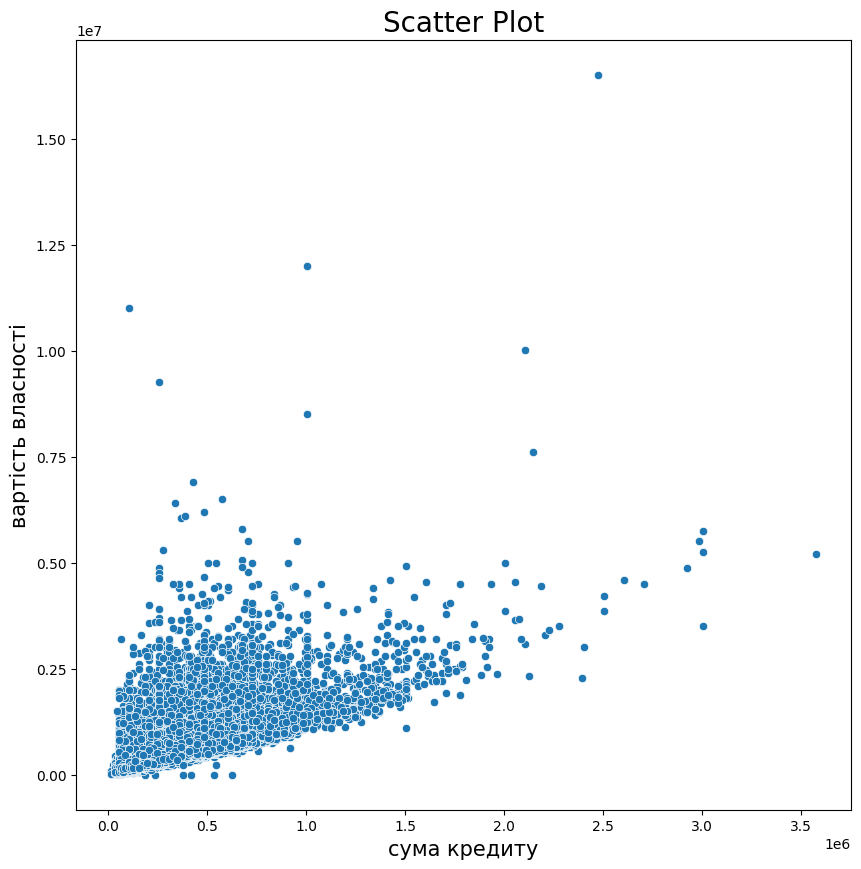

In [34]:
plt.rcParams["figure.figsize"] = (10,10)
sns.scatterplot(x=ds["loan_amount"],y=ds["property_value"],palette = "dark")
plt.title("Scatter Plot",fontsize=20)
plt.xlabel("сума кредиту",fontsize=15)
plt.ylabel("вартість власності",fontsize=15)
plt.show()

Більшість точок сконцентровано в нижній лівій частині графіка, де значення суми кредиту та вартості нерухомості є відносно малими. Це може свідчити про те, що більшість кредитів мають порівняно невеликі суми, а нерухомість у цих випадках також недорога.

Також спостерігається тенденція до позитивної кореляції — при збільшенні вартісості нерухомості  збільшується  сума кредиту. 

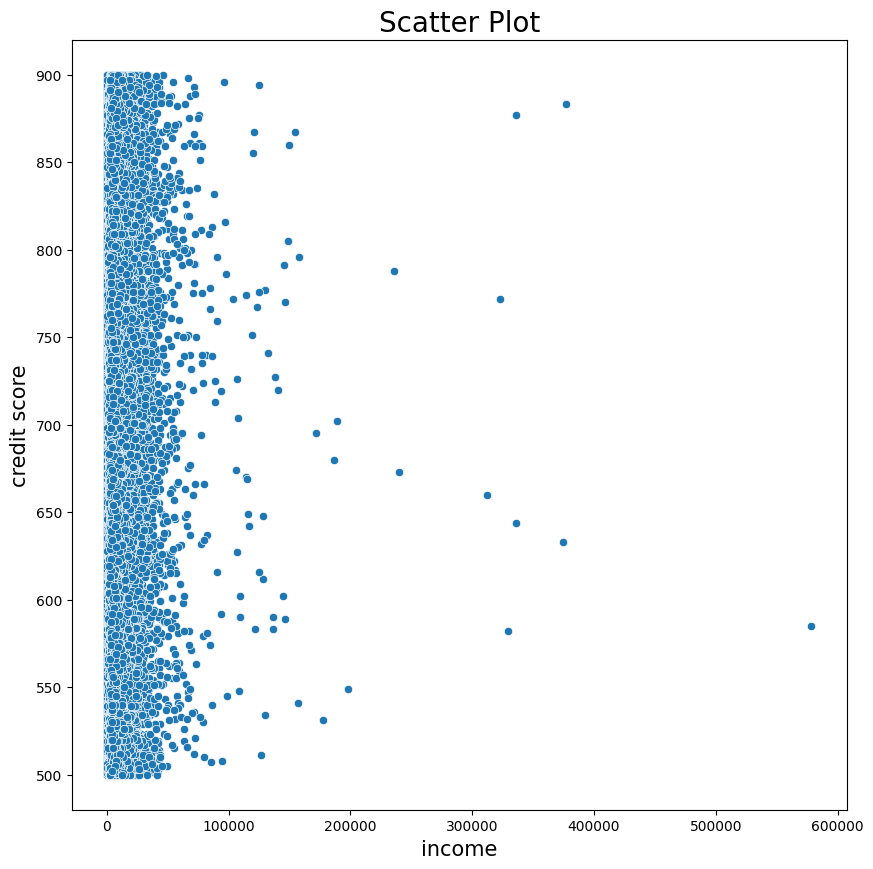

In [35]:
plt.rcParams["figure.figsize"] = (10,10)
sns.scatterplot(x=ds["income"],y=ds["Credit_Score"],palette = "dark")
plt.title("Scatter Plot",fontsize=20)
plt.xlabel("income",fontsize=15)
plt.ylabel("credit score",fontsize=15)
plt.show()

Більшість клієнтів із низьким доходом мають широкий діапазон кредитних рейтингів, що може свідчити про те, що дохід не є основним фактором у визначенні кредитоспроможності.

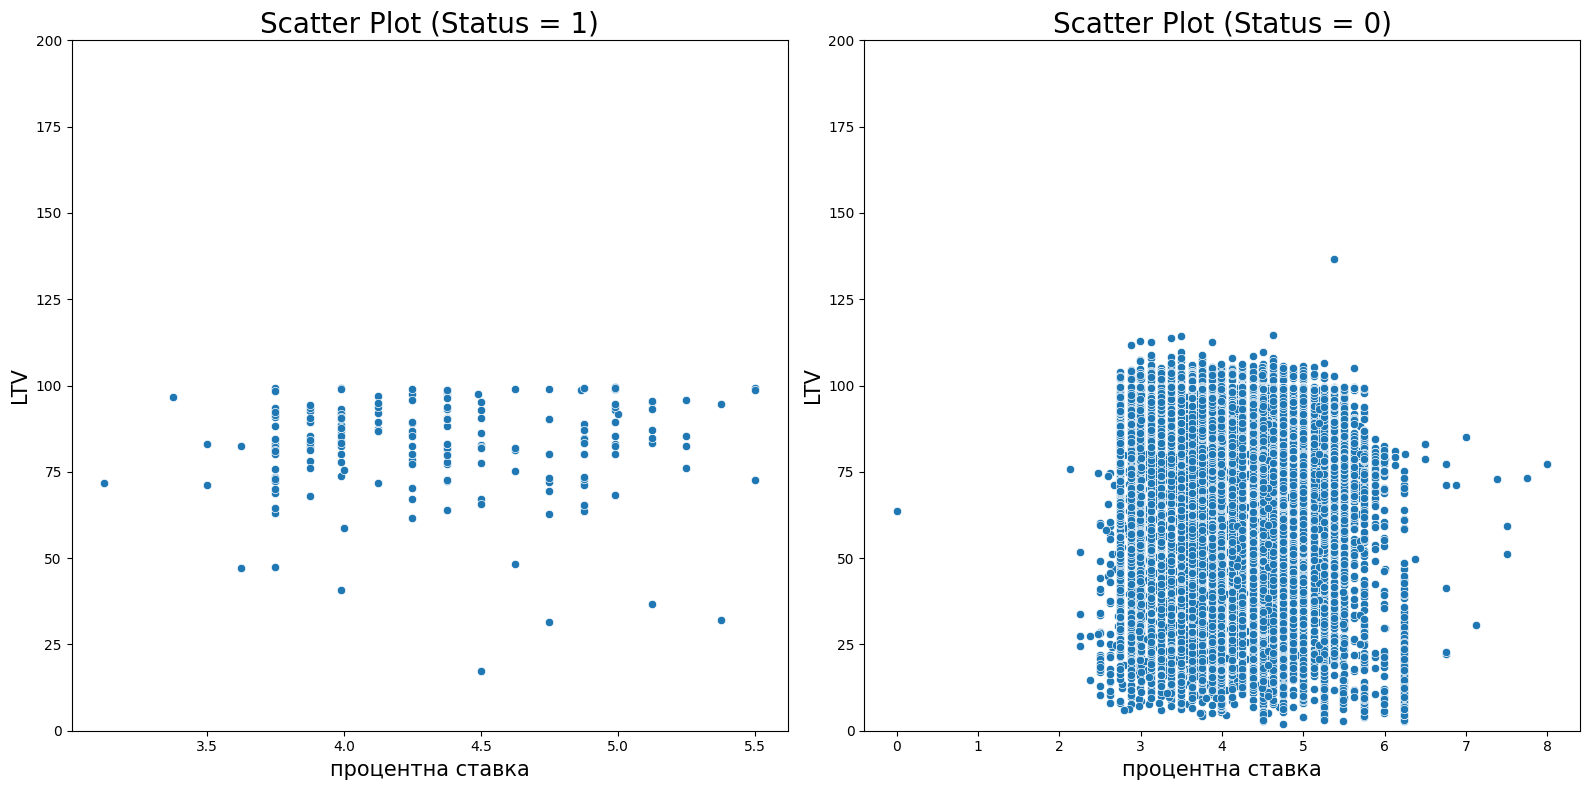

In [36]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))  # 1 рядок і 2 стовпці

# Перший графік для Status == 1
sns.scatterplot(x=ds[ds['Status'] == 1]["rate_of_interest"], y=ds[ds['Status'] == 1]["LTV"],palette="dark",ax=axes[0])
axes[0].set_title("Scatter Plot (Status = 1)", fontsize=20)
axes[0].set_xlabel("процентна ставка", fontsize=15)
axes[0].set_ylabel("LTV", fontsize=15)
axes[0].set_ylim(0, 200)

sns.scatterplot(x=ds[ds['Status'] == 0]["rate_of_interest"],y=ds[ds['Status'] == 0]["LTV"],palette="dark",ax=axes[1])
axes[1].set_title("Scatter Plot (Status = 0)", fontsize=20)
axes[1].set_xlabel("процентна ставка", fontsize=15)
axes[1].set_ylabel("LTV", fontsize=15)
axes[1].set_ylim(0, 200)

plt.tight_layout()
plt.show()

Для статусу 1: В основному зосереджений між 50 і 100. Це свідчить, що більшість схвалених кредитів мали відносно середнє або помірне співвідношення позики до вартості.

Для статусу 0: Процентна ставка 0% до 8%, хоча більшість сконцентрована в межах від 3% до 6%. Та Сильно скупчений LTV між   10 і 110, 

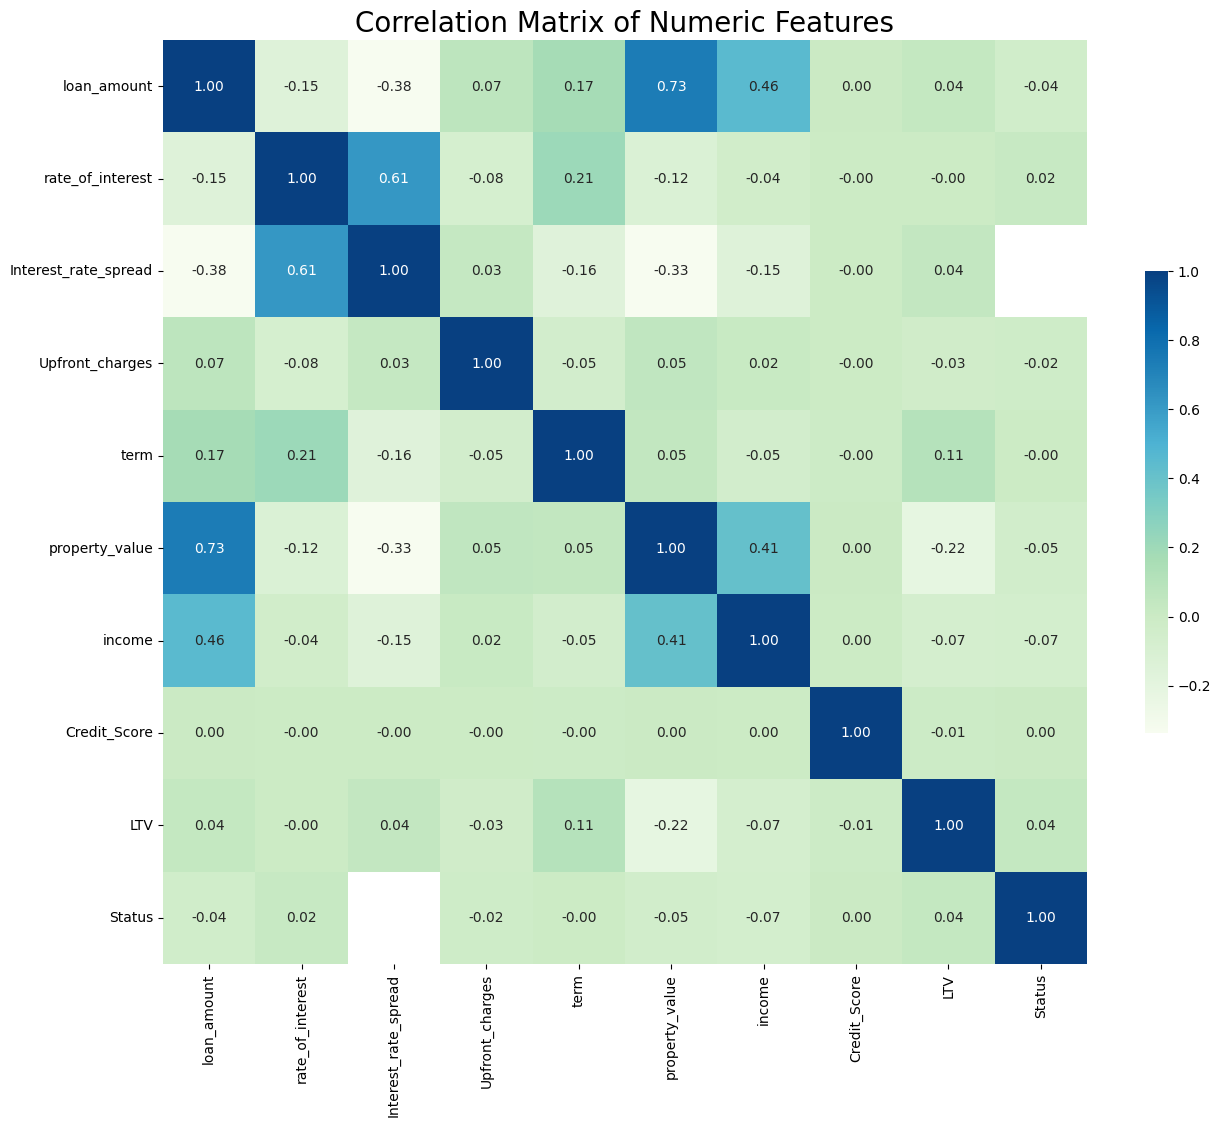

In [37]:
numeric_columns = ds.select_dtypes(include=['float64', 'int64']).columns
col_for_corr = ['loan_amount', 
                'rate_of_interest', 'Interest_rate_spread', 
                'Upfront_charges', 'term', 
                'property_value', 'income', 
                'Credit_Score', 'LTV', 'Status']
plt.rcParams["figure.figsize"] = (15,12)
correlation_matrix = ds[col_for_corr].corr()
sns.heatmap(
    correlation_matrix,
    vmax=1,
    square=True,
    annot=True,
    fmt='.2f',
    cmap='GnBu',
    cbar_kws={"shrink": .5},
    robust=True
)

plt.title('Correlation Matrix of Numeric Features', fontsize=20)
plt.show()

1) Проглядається сильна кореляція між loan_amount і property_value (0.73): вартість майна часто використовується як основа для визначення суми кредиту.

2) Середня позитивна кореляція між loan_amount і income (0.46): вищий дохід клієнта може дозволити взяти більший кредит.

2) Висока позитивна кореляція між процентною ставкою і її спредом (rate_of_interest і interest_rate_spread (0.61)). Це означає, що чим більший спред у процентних ставках, тим вищою є загальна процентна ставка.

3) Середня позитивна кореляція між вартістю майна та доходом позичальника (property_value і income (0.41)).Більш забезпечені позичальники, як правило, купують дорожчу нерухомість. 

4) Статус кредиту  практично не корелює з більшістю характеристик. Це може свідчити про те, що на статус кредиту впливають комплексні фактори, а не одна якась змінна, або про те, що у  даних може бути прихований вплив нечислових факторів.

5) Кредитний рейтинг (Credit_Score) практично не має кореляції з іншими факторами, що може свідчити про його слабку взаємодію з основними характеристиками або про те, що він може використовуватися в поєднанні з іншими даними для визначення ймовірності погашення кредиту.



In [38]:
def plot_distro(df, col = '', y_limit=None, x_limit_r=None, x_limit_l = None):
    plt.figure(figsize=(8,7))
    plt.grid(True)
    sns.distplot(df[col][df.Status == 1])
    sns.distplot(df[col][df.Status== 0])
    plt.legend(['status==1', 'status==0'])
    if y_limit:
        plt.ylim(top=y_limit)
    if x_limit_r:
        plt.xlim(right=x_limit_r)
    if x_limit_l:
        plt.xlim(left=x_limit_l)

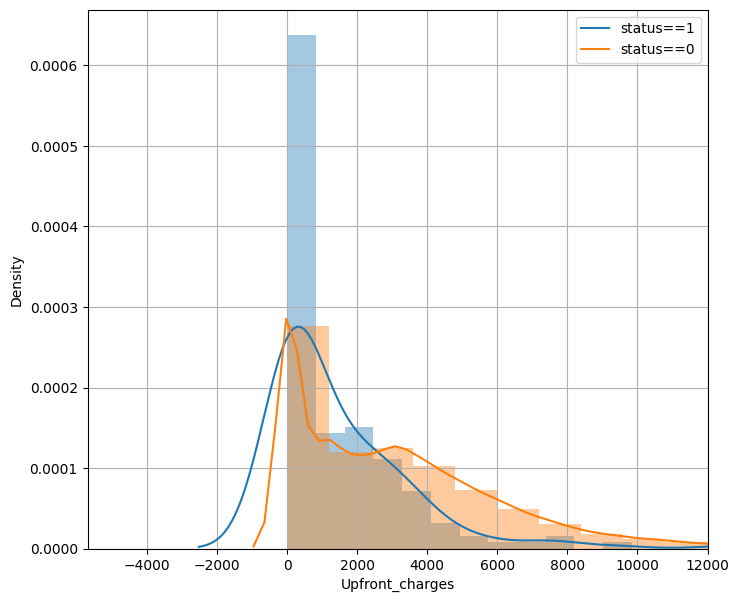

In [39]:
plot_distro(ds, col='Upfront_charges',x_limit_r=12_000,x_limit_l=0)

Даний графік показує  найбільша щільність спостерігається при дуже низьких значеннях авансових платежів (приблизно 0). Також для відхилених заявок  спостерігається більша частка заявок із середніми авансовими платежами (приблизно від 3000 ), порівняно зі схваленими заявками.Отже, загальна картина вказує на те, що схвалення заявки більш ймовірне при низьких(не нульових ) авансових платежах.

Висновок. Під час проведення дослідження було виявлено що історичні дані мають 34 колонки 148670 записів. Більшість даних мають тип об'єкт(21) , також присутні числові значення(13). Також є велика кількість втрачених даних. Між певними числовими характеристиками можна помітити кореляцію . Але  статус кредиту практично не корелює з більшістю характеристик. Це може свідчити про те, що на статус кредиту впливають комплексні фактори, а не одна якась змінна, або про те, що у  даних може бути прихований вплив нечислових факторів.